In [1]:
#Homework 1 for CSCI 5461
#Matthew Markman

In [2]:
import pandas as pd
import matplotlib.pyplot
import numpy as np
import scipy.stats
import statsmodels.sandbox.stats.multicomp

In [3]:
hw_data = pd.read_csv('/Users/MacProMatt/Desktop/algorithms-school_work/CSCI 5461/HW1/wang_data.txt', sep='\t')

In [4]:
df = pd.DataFrame(hw_data)
df = df.rename({'Unnamed: 0': "Probe"}, axis = 1)
df

,Probe,Gene,GSM36777,GSM36778,GSM36779,GSM36780,GSM36781,GSM36782,GSM36783,GSM36784,...,GSM37053,GSM37054,GSM37055,GSM37056,GSM37057,GSM37058,GSM37059,GSM37060,GSM37061,GSM37062
0,Relapse,NaN,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1007_s_at,DDR1,3848.1,6520.9,5285.7,4043.7,4263.6,2949.8,5498.9,3863.1,...,4058.2,4017.6,2841.0,2914.2,3681.0,3066.9,2773.0,2984.3,3540.0,2620.0
2,1053_at,RFC2,228.9,112.5,178.4,398.7,417.7,221.2,280.4,198.2,...,183.4,356.1,234.6,169.4,94.5,265.5,209.8,160.0,285.7,180.5
3,117_at,HSPA6,213.1,189.8,269.7,312.4,327.1,225.0,243.5,244.4,...,326.6,234.9,369.6,149.5,236.4,347.9,226.7,252.9,135.1,191.8
4,121_at,PAX8,1009.4,2083.3,1203.4,1104.4,1043.3,1117.6,1085.4,1423.1,...,1041.3,1195.6,751.5,1117.8,1022.4,1127.4,1071.8,1178.5,1256.7,1284.6
5,1255_g_at,GUCA1A,31.8,145.8,42.5,108.2,69.2,47.4,84.3,102.0,...,143.5,32.7,62.6,43.0,100.5,47.0,45.1,146.3,75.9,87.4
6,1294_at,UBA7,551.5,802.8,557.5,568.5,653.2,585.0,553.2,711.1,...,537.5,374.8,431.4,848.5,527.3,583.9,859.9,664.2,603.1,316.2
7,1316_at,THRA,176.7,278.4,183.3,187.7,185.8,166.6,92.5,259.3,...,347.1,270.8,281.7,286.9,167.4,138.2,121.0,183.3,125.0,177.0
8,1320_at,PTPN21,11.9,28.3,56.4,42.1,21.8,21.4,77.3,52.9,...,81.7,72.3,19.2,29.0,55.1,16.1,24.8,49.6,72.9,80.4
9,1405_i_at,CCL5,309.3,449.0,101.9,899.1,3629.3,117.9,124.3,649.4,...,658.2,125.6,276.9,527.7,12.9,577.3,935.6,443.5,73.5,334.9


In [5]:
#2a) How many probes are included in the dataset (This includes control probes)
print(len(df.Probe.unique()) - 1) #we subtract one for the relapse column

22283


In [5]:
#2b)
#How many patient samples are in the dataset? We will divide patients into two
#groups based on their relapse status for our analysis. How many patients were relapse
#free (relapse=0, i.e. no metastases)? How many patients had relapses (relapse=1)?

#Subtract 2 for probe and gene columns
#Since this number is the same with or without the unique argument, we know there are
#no duplicate patient columns
print(len(df.columns.unique()) - 2)

#Number of patients with relapses (relapse = 1)
print(sum(df.iloc[0][2:]))

286
107.0


In [7]:
#2c)
#How many unique genes are represented by the probes in the dataset? 
#Note: we would typically average multiple probes mapping to the same gene, 
#but to keep the lab relatively simple, we will analyze each probe independently.

#Subtract 1 for NaN in relapse column
#Note that this does not include probes where the gene is listed as 'NaN' (Control probes)
print(len(df.Gene.unique())-1)

13211


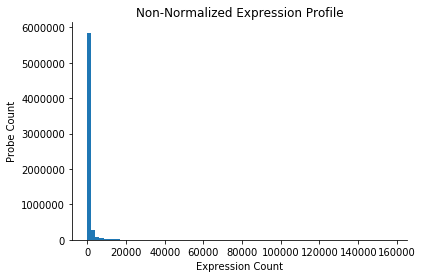

In [8]:
#a) Plot a histogram (x-axis: expression levels, y-axis: probe counts) of the complete dataset. 
#Describe the distribution—what is the overall shape? Replace any values <= 0 with a value of 1, 
#and log-transform (log 10) the entire data matrix. Plot the log- transformed data.

df1 = df.drop(0) #temporarily get rid of relapse column
toprow = df.iloc[0]
df1 = df1.drop('Gene', axis = 1)
df1 = df1.drop('Probe', axis = 1)
df1 = df1.stack()
x = df1.hist(grid = False, bins=75)
x.set_title('Non-Normalized Expression Profile')
x.set_xlabel('Expression Count')
x.set_ylabel('Probe Count')
x.spines['top'].set_visible(False)
x.spines['right'].set_visible(False)

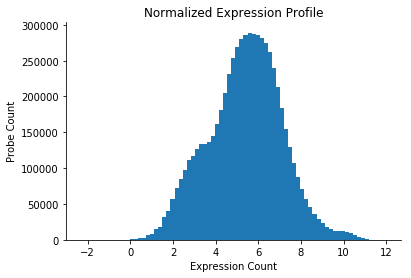

In [9]:
df_total = df.copy()

#Drop columns that can't be log transformed (will add back later)
df_total = df_total.drop(0)
df_total = df_total.drop('Probe', axis = 1)
df_total = df_total.drop('Gene', axis = 1)

#Switch all values <= 0 to 1
df_total[df_total <= 0] = 1

#log transform
df_total = df_total.transform(lambda x: np.log(x))
df_log_stack = df_total.stack()

y = df_log_stack.hist(grid = False, bins=75)
y.set_title('Normalized Expression Profile')
y.set_xlabel('Expression Count')
y.set_ylabel('Probe Count')
y.spines['top'].set_visible(False)
y.spines['right'].set_visible(False)

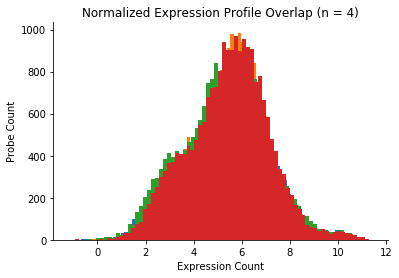

In [10]:
#(b) Plot individual histograms of the log-transformed data for the first four arrays (GSM36777-GSM36780).
#How do the distributions compare from sample to sample?

series1 = pd.Series(df_total['GSM36777'])
series2 = pd.Series(df_total['GSM36778'])
series3 = pd.Series(df_total['GSM36779'])
series4 = pd.Series(df_total['GSM36780'])

series_list = [series1, series2, series3, series4]

for i in series_list:
    z = i.hist(grid = False, bins=75)
    z.set_title('Normalized Expression Profile Overlap (n = 4)')
    z.set_xlabel('Expression Count')
    z.set_ylabel('Probe Count')
    z.spines['top'].set_visible(False)
    z.spines['right'].set_visible(False)

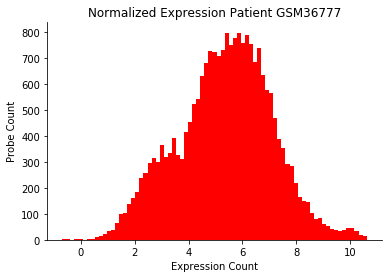

In [11]:
z = series1.hist(grid = False, bins=75, color = 'red')
z.set_title('Normalized Expression Patient GSM36777')
z.set_xlabel('Expression Count')
z.set_ylabel('Probe Count')
z.spines['top'].set_visible(False)
z.spines['right'].set_visible(False)

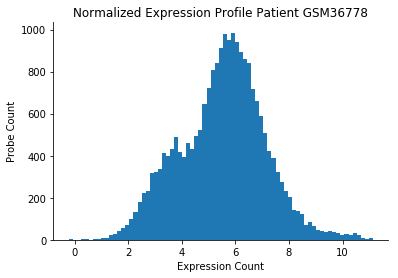

In [12]:
z = series2.hist(grid = False, bins=75)
z.set_title('Normalized Expression Profile Patient GSM36778')
z.set_xlabel('Expression Count')
z.set_ylabel('Probe Count')
z.spines['top'].set_visible(False)
z.spines['right'].set_visible(False)

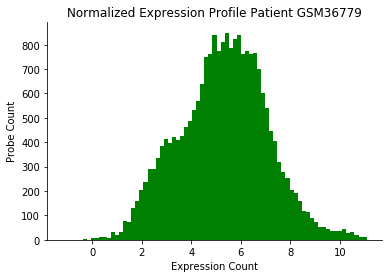

In [13]:
z = series3.hist(grid = False, bins=75, color = 'green')
z.set_title('Normalized Expression Profile Patient GSM36779')
z.set_xlabel('Expression Count')
z.set_ylabel('Probe Count')
z.spines['top'].set_visible(False)
z.spines['right'].set_visible(False)

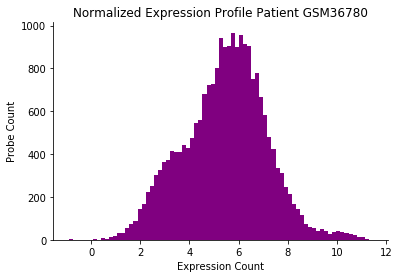

In [14]:
z = series4.hist(grid = False, bins=75, color = 'purple')
z.set_title('Normalized Expression Profile Patient GSM36780')
z.set_xlabel('Expression Count')
z.set_ylabel('Probe Count')
z.spines['top'].set_visible(False)
z.spines['right'].set_visible(False)

In [15]:
#c) Perform quantile normalization on your log-transformed data (from part b) across all arrays (samples) 
#such that each has the same empirical distribution. Use the mean of each probe across all samples as 
#the reference distribution for this normalization. 

df_total['Gene'] = df['Gene']
df_total['Probe'] = df['Probe']
df_total = df_total.set_index(df_total['Gene'])
df_total = df_total.set_index(df_total['Probe'], append=True)

#df_total = df_total.drop('Gene', axis = 1)
#df_total = df_total.drop('Probe', axis = 1)

distribution_array = df_total.mean(axis = 1)
distribution_array = distribution_array.sort_values(ascending=False)

norm_df = pd.DataFrame(index = df_total.index)

df_total

,,GSM36777,GSM36778,GSM36779,GSM36780,GSM36781,GSM36782,GSM36783,GSM36784,GSM36785,GSM36786,...,GSM37055,GSM37056,GSM37057,GSM37058,GSM37059,GSM37060,GSM37061,GSM37062,Gene,Probe
Gene,Probe,,,,,,,,,,,,,,,,,,,,,
DDR1,1007_s_at,8.255335,8.782768,8.572760,8.304915,8.357869,7.989493,8.612303,8.259225,8.122787,8.292023,...,7.951911,7.977351,8.210940,8.028423,7.927685,8.001120,8.171882,7.870930,DDR1,1007_s_at
RFC2,1053_at,5.433285,4.722953,5.184028,5.988209,6.034763,5.399067,5.636217,5.289277,5.719328,5.289277,...,5.457882,5.132263,4.548600,5.581615,5.346155,5.075174,5.654942,5.195731,RFC2,1053_at
HSPA6,117_at,5.361762,5.245971,5.597310,5.744284,5.790266,5.416100,5.495117,5.498806,5.853638,5.221976,...,5.912421,5.007296,5.465525,5.851915,5.423628,5.532994,4.906015,5.256453,HSPA6,117_at
PAX8,121_at,6.917111,7.641708,7.092906,7.007057,6.950144,7.018939,6.989704,7.260593,7.087072,6.901033,...,6.622071,7.019118,6.929908,7.027669,6.977095,7.071998,7.136245,7.158203,PAX8,121_at
GUCA1A,1255_g_at,3.459466,4.982236,3.749504,4.683981,4.237001,3.858622,4.434382,4.624973,3.126761,4.457830,...,4.136765,3.761200,4.610158,3.850148,3.808882,4.985659,4.329417,4.470495,GUCA1A,1255_g_at
UBA7,1294_at,6.312642,6.688106,6.323463,6.343001,6.481883,6.371612,6.315720,6.566813,6.470954,6.224360,...,6.067036,6.743470,6.267770,6.369730,6.756816,6.498583,6.402083,5.756375,UBA7,1294_at
THRA,1316_at,5.174453,5.629059,5.211124,5.234845,5.224671,5.115596,4.527209,5.557986,5.169347,5.539301,...,5.640843,5.659134,5.120386,4.928702,4.795791,5.211124,4.828314,5.176150,THRA,1316_at
PTPN21,1320_at,2.476538,3.342862,4.032469,3.740048,3.081910,3.063391,4.347694,3.968403,3.010621,3.100092,...,2.954910,3.367296,4.009150,2.778819,3.210844,3.903991,4.289089,4.387014,PTPN21,1320_at
CCL5,1405_i_at,5.734312,6.107023,4.623992,6.801394,8.196795,4.769837,4.822698,6.476049,4.844974,6.491785,...,5.623656,6.268528,2.557227,6.358362,6.841188,6.094698,4.297285,5.813832,CCL5,1405_i_at


In [16]:
for column in df_total:
    my_series = pd.Series(df_total[column])
    my_series = my_series.sort_values(ascending=False)
    for i in range(len(distribution_array)):
        my_series[i] = distribution_array[i]
    norm_df[column] = my_series

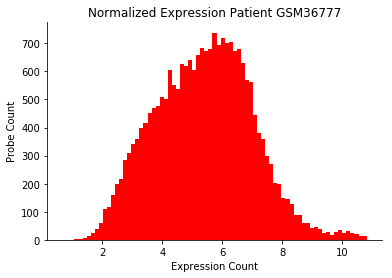

In [17]:
#Plot a histogram of the normalized data for each 
#of the first four samples (GSM36777- GSM36780). Use the normalized data for the remaining problems.

z = norm_df['GSM36777'].hist(grid = False, bins=75, color = 'red')
z.set_title('Normalized Expression Patient GSM36777')
z.set_xlabel('Expression Count')
z.set_ylabel('Probe Count')
z.spines['top'].set_visible(False)
z.spines['right'].set_visible(False)

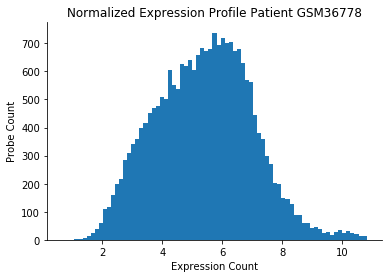

In [18]:
z = norm_df['GSM36778'].hist(grid = False, bins=75)
z.set_title('Normalized Expression Profile Patient GSM36778')
z.set_xlabel('Expression Count')
z.set_ylabel('Probe Count')
z.spines['top'].set_visible(False)
z.spines['right'].set_visible(False)

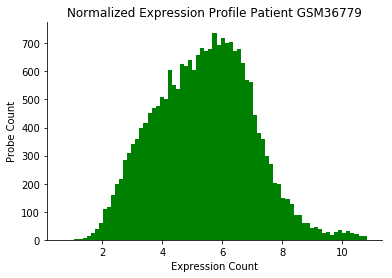

In [19]:
z = norm_df['GSM36779'].hist(grid = False, bins=75, color = 'green')
z.set_title('Normalized Expression Profile Patient GSM36779')
z.set_xlabel('Expression Count')
z.set_ylabel('Probe Count')
z.spines['top'].set_visible(False)
z.spines['right'].set_visible(False)

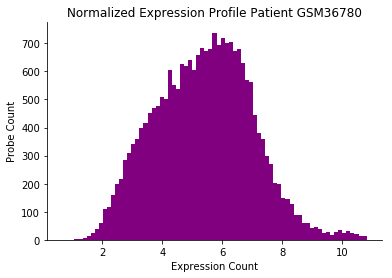

In [20]:
z = norm_df['GSM36780'].hist(grid = False, bins=75, color = 'purple')
z.set_title('Normalized Expression Profile Patient GSM36780')
z.set_xlabel('Expression Count')
z.set_ylabel('Probe Count')
z.spines['top'].set_visible(False)
z.spines['right'].set_visible(False)

In [21]:
#Use the t-test and Wilcoxon rank-sum statistics to identify differentially expressed probes with a per-probe
#significance level of p < 0.05. You should divide the gene expression data into two groups 
#(metastasis vs. non- metastasis), using the relapse variable in the clinical data, and test each probe independently.

#Divide the data into two groups
#for each probe, compute t test and wilcox test values for whether the two groups vary significantly

norm_df = norm_df.append(df.iloc[0])
norm_df.rename(index={0:'relapse'}, inplace=True)

norm_df = norm_df.drop('Gene', axis = 1)
norm_df = norm_df.drop('Probe', axis = 1)




#    if norm_df[column]['relapse']:
#        norm_df_relapse[column] = norm_df[column]
#    else:
#        norm_df_recover[column] = norm_df[column]

#norm_df







#t_series = pd.Series(index = norm_df.index)
#rank_series = pd.Series(index = norm_df.index)




In [22]:
norm_df_relapse = pd.DataFrame(index = df_total.index)
norm_df_recover = pd.DataFrame(index = df_total.index)

for column in norm_df:
    if norm_df[column]['relapse']:
        norm_df_relapse[column] = norm_df[column]
    else:
        norm_df_recover[column] = norm_df[column]

In [ ]:
norm_df = norm_df.drop('relapse')

In [35]:
norm = norm_df_recover.transpose(copy = True)
relapse = norm_df_relapse.transpose(copy = True)

t_out = scipy.stats.ttest_ind(norm, relapse)

179

In [62]:
norm_df['ttest'] = t_out.pvalue

rank_list = []

for i in range(len(norm_df)):
    rankval = scipy.stats.ranksums(norm_df_recover.iloc[i], norm_df_relapse.iloc[i])
    rank_list.append(rankval.pvalue)
    
norm_df['rank'] = rank_list
norm_df

,GSM36777,GSM36778,GSM36779,GSM36780,GSM36781,GSM36782,GSM36783,GSM36784,GSM36785,GSM36786,...,GSM37055,GSM37056,GSM37057,GSM37058,GSM37059,GSM37060,GSM37061,GSM37062,ttest,rank
"(DDR1, 1007_s_at)",8.116588,8.642642,8.325644,8.201609,8.259961,7.909864,8.427254,8.192904,8.021713,8.160696,...,7.823614,7.907326,8.056790,7.875603,7.830203,7.911145,8.011118,7.720175,0.788033,0.419827
"(RFC2, 1053_at)",5.397832,4.389185,5.245969,5.899731,5.913323,5.286793,5.684970,5.001196,5.611278,5.262383,...,5.379280,4.927826,4.457625,5.584635,5.287461,4.819533,5.619614,5.166272,0.236284,0.402171
"(HSPA6, 117_at)",5.320693,4.955887,5.651230,5.640372,5.648940,5.308956,5.548478,5.263375,5.756922,5.188563,...,5.856690,4.790596,5.447182,5.838174,5.364030,5.354753,4.812478,5.239640,0.909270,0.815988
"(PAX8, 121_at)",6.839510,7.573265,7.036699,6.942991,6.879832,6.941095,6.913310,7.211574,7.016158,6.812069,...,6.568979,6.930593,6.888684,6.964523,6.913310,7.006073,7.064865,7.062077,0.450984,0.727875
"(GUCA1A, 1255_g_at)",3.655502,4.655416,3.920429,4.500387,4.037706,3.804508,4.480309,4.297435,3.233802,4.371934,...,4.053008,3.717318,4.515457,3.983954,3.841146,4.728546,4.238437,4.385693,0.240429,0.303438
"(UBA7, 1294_at)",6.268306,6.643440,6.325925,6.280720,6.388055,6.301846,6.296363,6.483663,6.415370,6.182233,...,6.012129,6.666377,6.269873,6.347820,6.697079,6.435646,6.363499,5.778757,0.043356,0.040001
"(THRA, 1316_at)",5.136293,5.425130,5.269978,5.067553,4.980209,4.964313,4.579586,5.336246,4.965617,5.525878,...,5.580047,5.538101,5.060828,4.918841,4.681221,4.973579,4.731738,5.143895,0.546172,0.691035
"(PTPN21, 1320_at)",2.902296,3.263948,4.141887,3.728714,3.153784,3.254212,4.388842,3.802458,3.146838,3.379964,...,3.094165,3.407252,4.025926,3.207681,3.407640,3.781213,4.206364,4.308582,0.350336,0.237788
"(CCL5, 1405_i_at)",5.699893,6.006951,4.664463,6.743203,8.138163,4.587196,4.868399,6.394954,4.603306,6.439909,...,5.560221,6.190901,2.835417,6.331585,6.775756,6.009187,4.213214,5.826786,0.037117,0.032102
"(CYP2E1, 1431_at)",3.936160,4.475196,4.493621,4.321421,4.302628,4.823564,4.080229,4.505585,4.331466,4.043257,...,4.141887,4.186238,3.837241,3.943960,4.271097,4.093281,4.742163,4.696175,0.501014,0.743464


In [65]:
norm_df.sort_values(by =['ttest'])
#The top genes for the t test are:
#ACBD3, WFDC1, ABCC5, RACGAP1, CLINT1, FBX07, ZFP36L2, SHC1, ERP29, NEK2

,GSM36777,GSM36778,GSM36779,GSM36780,GSM36781,GSM36782,GSM36783,GSM36784,GSM36785,GSM36786,...,GSM37055,GSM37056,GSM37057,GSM37058,GSM37059,GSM37060,GSM37061,GSM37062,ttest,rank
"(ACBD3, 202324_s_at)",7.428788,7.687435,7.321419,7.186372,6.808510,7.435044,7.391227,7.034755,7.477670,7.475522,...,7.492090,7.530144,7.819922,7.424587,7.491122,7.225378,6.980542,7.716563,4.180574e-07,7.349828e-07
"(WFDC1, 219478_at)",3.385625,4.680709,4.481026,2.777442,4.652582,5.434628,5.015169,5.636483,4.559257,3.717088,...,4.487974,4.991138,6.166770,5.244497,3.387674,4.316487,3.064514,4.869926,1.583293e-06,1.768041e-06
"(ABCC5, 209380_s_at)",6.928868,7.458556,6.425924,6.994203,6.029937,6.681594,6.049377,6.888381,7.162689,6.662274,...,6.287865,6.954985,6.889620,7.402603,6.552189,6.487520,6.991924,6.597676,2.300614e-06,1.722802e-05
"(RACGAP1, 222077_s_at)",6.446270,7.356728,5.954076,5.729466,6.626641,5.874040,5.768314,5.432496,6.640734,6.628378,...,6.747820,5.633882,6.399233,6.570284,5.395643,6.405562,5.611278,6.953006,3.744510e-06,7.067712e-06
"(CLINT1, 201769_at)",7.143417,7.307312,7.001463,6.940614,6.689104,6.879743,6.870922,6.621091,6.814604,7.017658,...,7.401346,6.877363,6.951226,7.129603,6.886342,6.730051,6.840756,6.720449,4.873324e-06,3.595689e-06
"(FBXO7, 201178_at)",7.485763,7.715565,7.956807,8.034990,7.579123,7.525773,7.877990,7.569847,7.635175,7.547988,...,7.555001,7.579674,7.602927,7.327535,7.594898,7.762011,7.205321,7.641450,5.807846e-06,1.321909e-05
"(ZFP36L2, 201369_s_at)",6.196525,5.581166,5.853646,6.699859,6.576707,6.383016,5.423029,6.147827,6.482426,6.125484,...,6.819855,6.763581,6.123878,6.273385,6.844647,6.130150,5.992014,6.391068,6.064825e-06,4.676234e-06
"(SHC1, 214853_s_at)",8.109157,8.142603,7.937023,7.701508,7.518075,8.162782,8.204339,8.015888,7.975806,8.081467,...,7.436647,8.438419,8.166876,8.273659,8.231234,7.863073,8.146462,7.995987,6.439620e-06,8.116456e-06
"(ERP29, 201216_at)",8.015520,7.583639,8.347887,8.619902,7.869032,7.873946,8.517856,7.992600,8.004915,7.615186,...,8.034990,7.919156,7.484837,7.679438,8.039865,8.234723,7.849554,8.105075,9.569786e-06,1.671867e-05
"(NEK2, 204641_at)",6.475709,6.995013,4.666684,5.296025,6.976677,5.166730,5.901948,5.609432,6.550728,6.518891,...,6.717745,4.479108,6.226707,5.803075,4.651143,6.210031,4.981474,6.794378,9.983478e-06,7.166448e-06


In [66]:
norm_df.sort_values(by =['rank'])
#The top genes for the rank are:
#ACBD3, WFDC1, BLZF1, CLINT1, ZFP36L2, RACGAP1, NEK2, LACTB2, SHC1, SEC24A

,GSM36777,GSM36778,GSM36779,GSM36780,GSM36781,GSM36782,GSM36783,GSM36784,GSM36785,GSM36786,...,GSM37055,GSM37056,GSM37057,GSM37058,GSM37059,GSM37060,GSM37061,GSM37062,ttest,rank
"(ACBD3, 202324_s_at)",7.428788,7.687435,7.321419,7.186372,6.808510,7.435044,7.391227,7.034755,7.477670,7.475522,...,7.492090,7.530144,7.819922,7.424587,7.491122,7.225378,6.980542,7.716563,4.180574e-07,7.349828e-07
"(WFDC1, 219478_at)",3.385625,4.680709,4.481026,2.777442,4.652582,5.434628,5.015169,5.636483,4.559257,3.717088,...,4.487974,4.991138,6.166770,5.244497,3.387674,4.316487,3.064514,4.869926,1.583293e-06,1.768041e-06
"(BLZF1, 32088_at)",4.045804,4.103056,4.171204,3.354114,3.819545,3.993184,4.346844,3.755441,4.141503,4.539642,...,4.149409,3.646404,4.201919,4.603306,4.216129,4.276292,3.817394,4.265557,3.857122e-05,2.446633e-06
"(CLINT1, 201769_at)",7.143417,7.307312,7.001463,6.940614,6.689104,6.879743,6.870922,6.621091,6.814604,7.017658,...,7.401346,6.877363,6.951226,7.129603,6.886342,6.730051,6.840756,6.720449,4.873324e-06,3.595689e-06
"(ZFP36L2, 201369_s_at)",6.196525,5.581166,5.853646,6.699859,6.576707,6.383016,5.423029,6.147827,6.482426,6.125484,...,6.819855,6.763581,6.123878,6.273385,6.844647,6.130150,5.992014,6.391068,6.064825e-06,4.676234e-06
"(RACGAP1, 222077_s_at)",6.446270,7.356728,5.954076,5.729466,6.626641,5.874040,5.768314,5.432496,6.640734,6.628378,...,6.747820,5.633882,6.399233,6.570284,5.395643,6.405562,5.611278,6.953006,3.744510e-06,7.067712e-06
"(NEK2, 204641_at)",6.475709,6.995013,4.666684,5.296025,6.976677,5.166730,5.901948,5.609432,6.550728,6.518891,...,6.717745,4.479108,6.226707,5.803075,4.651143,6.210031,4.981474,6.794378,9.983478e-06,7.166448e-06
"(LACTB2, 218701_at)",5.062997,5.978101,5.739144,4.678192,5.260489,4.967158,5.032614,4.939867,5.644581,5.987673,...,5.038478,5.232767,4.351005,5.792783,5.025226,5.099428,4.987542,5.580561,1.133037e-05,8.060662e-06
"(SHC1, 214853_s_at)",8.109157,8.142603,7.937023,7.701508,7.518075,8.162782,8.204339,8.015888,7.975806,8.081467,...,7.436647,8.438419,8.166876,8.273659,8.231234,7.863073,8.146462,7.995987,6.439620e-06,8.116456e-06
"(SEC24A, 212900_at)",6.724615,6.806550,6.609411,6.947968,5.999950,6.754420,6.260461,6.171130,6.110716,6.803020,...,6.818775,6.804526,6.523088,6.742661,6.334567,6.886864,6.557708,6.298927,1.560780e-05,9.092105e-06


In [87]:
de_ttest = []
de_ranksum = []

for index, row in norm_df.iterrows():
    if row['ttest'] <= 0.05:
        de_ttest.append(row)
    if row['rank'] <= 0.05:
        de_ranksum.append(row)



In [93]:
print(len(de_ttest))
print(len(de_ranksum))

#There are 3259 DE genes according to the t test and 3292 according to the rank sum test

df_de_t = pd.DataFrame(de_ttest)
df_de_rank = pd.DataFrame(de_ranksum)

3259
3292


In [97]:
my_idx = df_de_t.index.intersection(df_de_rank.index)
intersection = pd.DataFrame(df_de_rank, index = my_idx)

intersection

,GSM36777,GSM36778,GSM36779,GSM36780,GSM36781,GSM36782,GSM36783,GSM36784,GSM36785,GSM36786,...,GSM37055,GSM37056,GSM37057,GSM37058,GSM37059,GSM37060,GSM37061,GSM37062,ttest,rank
"(UBA7, 1294_at)",6.268306,6.643440,6.325925,6.280720,6.388055,6.301846,6.296363,6.483663,6.415370,6.182233,...,6.012129,6.666377,6.269873,6.347820,6.697079,6.435646,6.363499,5.778757,0.043356,0.040001
"(CCL5, 1405_i_at)",5.699893,6.006951,4.664463,6.743203,8.138163,4.587196,4.868399,6.394954,4.603306,6.439909,...,5.560221,6.190901,2.835417,6.331585,6.775756,6.009187,4.213214,5.826786,0.037117,0.032102
"(FNTB, 1773_at)",4.217168,4.808774,4.843647,4.241249,3.762671,3.996279,4.681699,4.150070,5.086009,3.309067,...,3.417896,3.532829,4.634182,3.352354,3.117987,3.517663,4.782945,4.596475,0.035846,0.044807
"(PMS2P11, 179_at)",6.483663,6.873288,6.575926,6.681710,6.802339,6.396694,6.539922,6.519380,6.798486,6.216510,...,6.614150,6.939976,6.994203,6.580327,6.469566,6.451827,6.558696,6.668112,0.018440,0.007774
"(PRPF8, 200000_s_at)",7.198951,6.046849,7.409132,7.316973,7.462680,7.041385,6.997058,7.080257,7.299504,6.903476,...,7.161489,6.903975,6.553353,6.953353,7.098884,6.958176,7.051366,7.328589,0.029937,0.022663
"(CAPNS1, 200001_at)",8.084187,6.785152,8.297804,8.611574,8.202039,8.032153,8.377774,8.226787,8.384401,7.376914,...,7.795286,6.642104,7.264311,7.811847,7.823971,7.766625,8.110970,7.767949,0.029090,0.043870
"(EIF3D, 200005_at)",7.764555,7.781584,7.938197,7.761317,7.740767,8.004134,8.526691,7.924579,7.881623,8.347887,...,7.693169,8.396638,8.059947,7.613846,7.787118,8.490024,7.765447,7.770291,0.030236,0.020198
"(HNRNPC, 200014_s_at)",7.835095,8.325198,8.094982,7.465007,7.757701,8.031340,8.180875,7.979958,7.957455,8.264590,...,7.685668,8.119247,8.080494,7.957140,8.150754,8.112693,8.025632,8.043927,0.009636,0.012842
"(HNRNPA1, 200016_x_at)",9.514490,9.919863,9.527462,9.517535,9.325854,9.640314,9.874080,9.850034,9.564422,9.799667,...,9.545219,9.716396,9.617509,9.514490,9.754860,9.327874,9.853401,9.731984,0.031326,0.030196
"(RPS5, 200024_at)",9.425731,8.021713,9.567886,9.272800,8.345108,9.224971,9.814339,9.293911,9.308973,9.564422,...,8.820446,9.039902,8.738076,9.484155,8.985580,9.619432,9.710884,9.369207,0.007326,0.039010


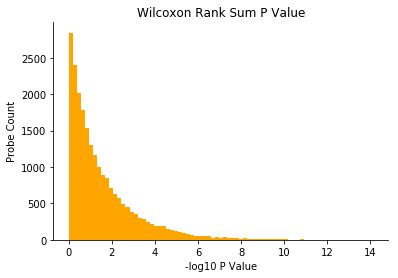

In [106]:
rank_series = norm_df['rank']
rank_series = -np.log(rank_series)
z = rank_series.hist(grid = False, bins=75, color = 'orange')
z.set_title('Wilcoxon Rank Sum P Value')
z.set_xlabel('-log10 P Value')
z.set_ylabel('Probe Count')
z.spines['top'].set_visible(False)
z.spines['right'].set_visible(False)

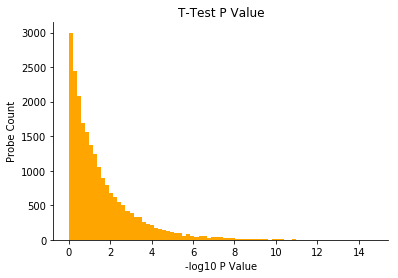

In [108]:
t_series = norm_df['ttest']
t_series = -np.log(t_series)
z = t_series.hist(grid = False, bins=75, color = 'orange')
z.set_title('T-Test P Value')
z.set_xlabel('-log10 P Value')
z.set_ylabel('Probe Count')
z.spines['top'].set_visible(False)
z.spines['right'].set_visible(False)

In [136]:
norm_df.to_csv(path_or_buf='/Users/MacProMatt/Desktop/norm_df_forR.csv')

In [ ]:
new_dat = pd.read_csv('/Users/MacProMatt/Desktop/algorithms-school_work/CSCI 5461/HW1/ExtraCredit_vantveer.txt', quote = "", stringsAsFactors=FALSE, sep = '\t')